**Cavity Flow with Navier–Stokes**
=====
***

**C++ result**
--

The C++ code can be found in the folder **navier-stokes**.

In [1]:
from numpy import genfromtxt
from matplotlib import pyplot
from matplotlib import cm
import numpy
nx = 100
ny = 100

### **No parallelization**

This is the result of the implementation of the Navier-Stokes equation in c++. This code is essentially the provided python code translated to c++.

#### Run

#### Result

In [2]:
ucpp = genfromtxt('navier-stokes/result/u.csv', delimiter=',')
vcpp = genfromtxt('navier-stokes/result/v.csv', delimiter=',')
pcpp = genfromtxt('navier-stokes/result/p.csv', delimiter=',')

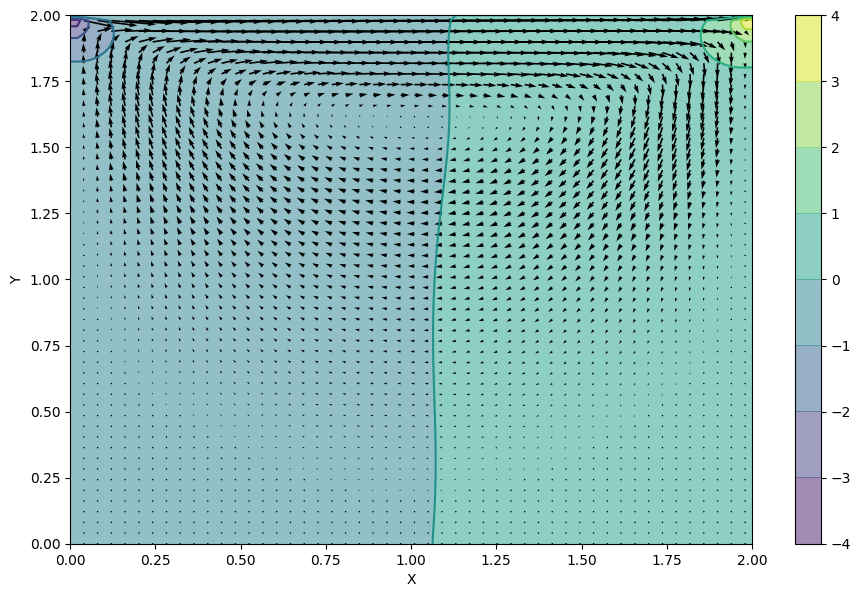

In [3]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp[::2, ::2], vcpp[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

#### Computation time

In [4]:
f = open('navier-stokes/result/milliseconds', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

7928 milliseconds


### **OpenMP**

This is the result of extending the above code with OpenMP. Most of the for-loops, which represent matrix operations can be parallized. To add the parallelization, "#pragma omp parallel for" has been added above the for-loops.

#### Run

#### Result

In [5]:
ucpp_openmp = genfromtxt('navier-stokes/result/u-openmp.csv', delimiter=',')
vcpp_openmp = genfromtxt('navier-stokes/result/v-openmp.csv', delimiter=',')
pcpp_openmp = genfromtxt('navier-stokes/result/p-openmp.csv', delimiter=',')

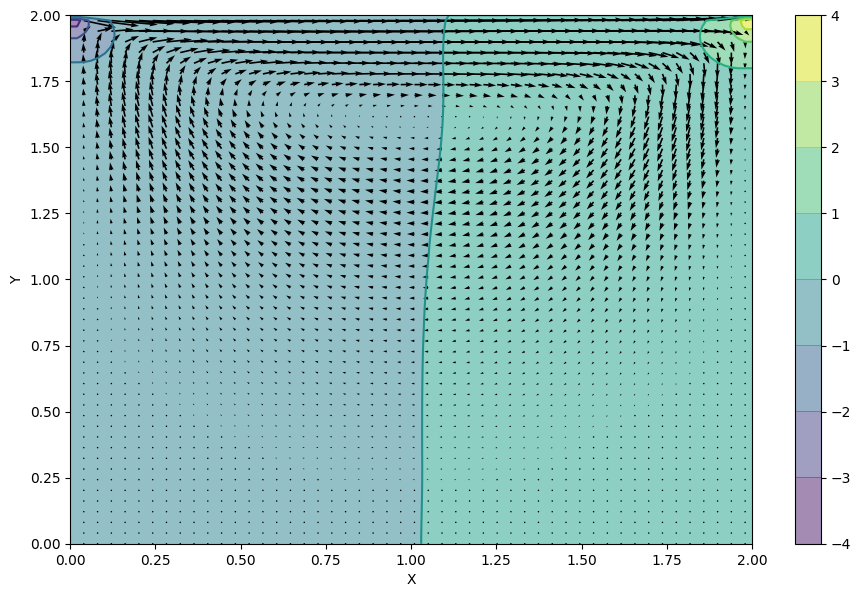

In [6]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp_openmp, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp_openmp, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp_openmp[::2, ::2], vcpp_openmp[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [7]:
f = open('navier-stokes/result/milliseconds-openmp', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

2 milliseconds


### **MPI**

This is the result of extending the original c++ code with MPI. The implementation broadcasts the following data:

\- matrix b: at the end of function "build_up_b"

\- matrix p: every iteration in the first loop of function "pressure_poisson"

\- matrix u and v: every iteration in the first loop of "cavity_flow"

To notify the other processes of their result. It seems like the data is cut off, as the larger the number of processes, the sparser the matrices become. Therefore, I believe the problem lies with the indexation in the functions.

#### Run

#### Result

In [8]:
ucpp_mpi = genfromtxt('navier-stokes/result/u-mpi-2.csv', delimiter=',')
vcpp_mpi = genfromtxt('navier-stokes/result/v-mpi-2.csv', delimiter=',')
pcpp_mpi = genfromtxt('navier-stokes/result/p-mpi-2.csv', delimiter=',')

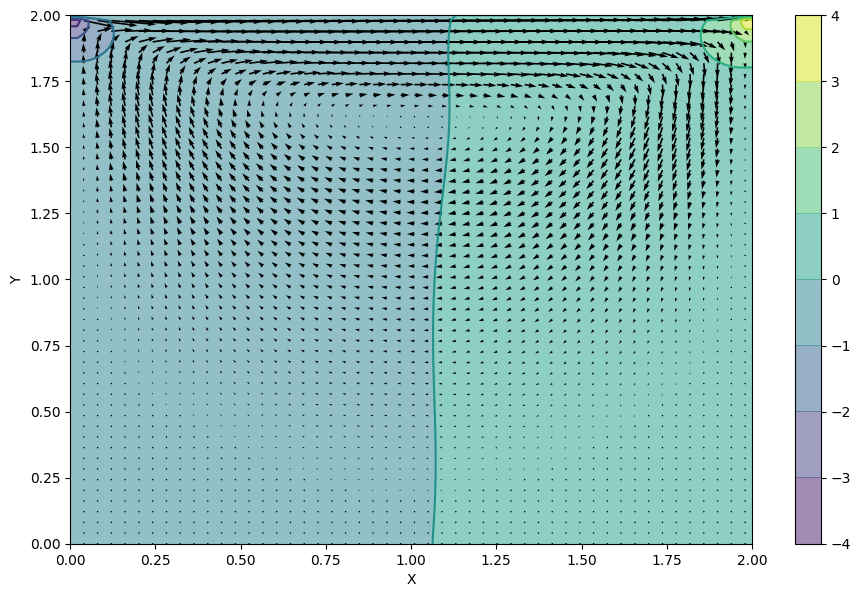

In [9]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp_mpi, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp_mpi, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp_mpi[::2, ::2], vcpp_mpi[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [10]:
f = open('navier-stokes/result/milliseconds-mpi-2', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

5 milliseconds


#### Run

#### Result

In [11]:
ucpp_mpi = genfromtxt('navier-stokes/result/u-mpi-4.csv', delimiter=',')
vcpp_mpi = genfromtxt('navier-stokes/result/v-mpi-4.csv', delimiter=',')
pcpp_mpi = genfromtxt('navier-stokes/result/p-mpi-4.csv', delimiter=',')

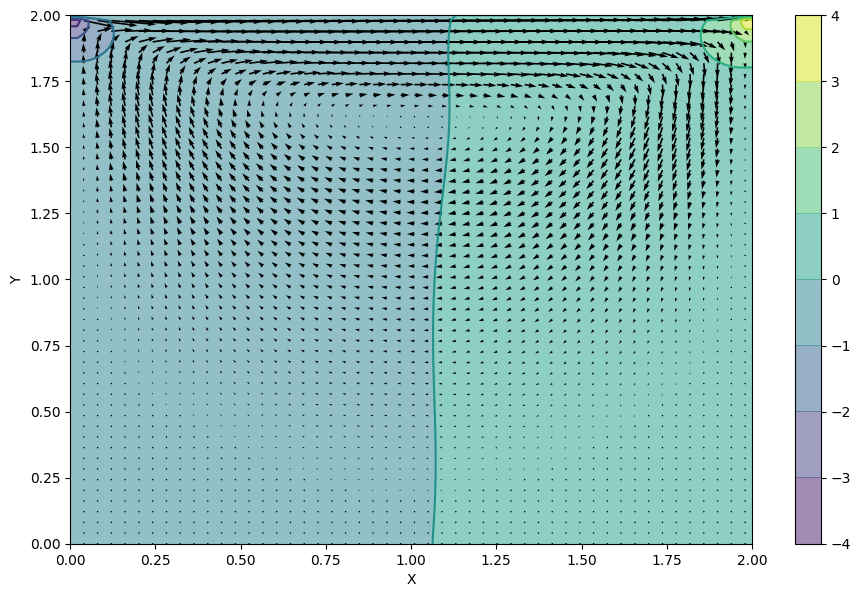

In [12]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp_mpi, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp_mpi, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp_mpi[::2, ::2], vcpp_mpi[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [13]:
f = open('navier-stokes/result/milliseconds-mpi-4', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

4 milliseconds
